In [1]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
path = kagglehub.dataset_download("crowdflower/twitter-user-gender-classification")
path


100%|██████████| 3.02M/3.02M [00:00<00:00, 3.51MB/s]

Extracting files...


'/root/.cache/kagglehub/datasets/crowdflower/twitter-user-gender-classification/versions/1'

In [2]:
import pandas as pd
import os
csv_path = os.path.join(path, "gender-classifier-DFE-791531.csv")
df = pd.read_csv(csv_path, encoding="ISO-8859-1")
df.T


,0,1,2,3,4,5,6,7,8,9,...,20040,20041,20042,20043,20044,20045,20046,20047,20048,20049
_unit_id,815719226,815719227,815719228,815719229,815719230,815719231,815719232,815719233,815719234,815719235,...,815756417,815756542,815756642,815756700,815756767,815757572,815757681,815757830,815757921,815757985
_golden,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
_unit_state,finalized,finalized,finalized,finalized,finalized,finalized,finalized,finalized,finalized,finalized,...,golden,golden,golden,golden,golden,golden,golden,golden,golden,golden
_trusted_judgments,3,3,3,3,3,3,3,3,3,3,...,253,252,212,240,227,259,248,264,250,249
_last_judgment_at,10/26/15 23:24,10/26/15 23:30,10/26/15 23:33,10/26/15 23:10,10/27/15 1:15,10/27/15 1:47,10/27/15 1:57,10/26/15 23:48,10/27/15 1:52,10/27/15 1:49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,male,male,male,male,female,female,brand,male,female,female,...,male,brand,brand,male,female,female,male,male,female,female
gender:confidence,1.0,1.0,0.6625,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.8472,1.0,0.6364,1.0,1.0,1.0,1.0,1.0,0.8489,1.0
profile_yn,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,...,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
profile_yn:confidence,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
created,12/5/13 1:48,10/1/12 13:51,11/28/14 11:30,6/11/09 22:39,4/16/14 13:23,3/11/10 18:14,4/24/08 13:03,12/3/12 21:54,9/8/15 4:50,5/13/11 3:32,...,8/16/13 14:48,8/11/11 10:01,6/8/14 19:07,9/27/11 0:19,6/11/14 1:55,8/5/15 21:16,8/15/12 21:17,9/3/12 1:17,11/6/12 23:46,4/14/14 17:22


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [ ]:
df = df[df['gender'].isin(['female', 'male'])]
df = df[df['gender:confidence'] > 0.9]
df.T

,0,1,3,4,5,7,8,9,15,16,...,20035,20036,20037,20039,20043,20044,20045,20046,20047,20049
_unit_id,815719226,815719227,815719229,815719230,815719231,815719233,815719234,815719235,815719241,815719242,...,815755887,815756011,815756103,815756332,815756700,815756767,815757572,815757681,815757830,815757985
_golden,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
_unit_state,finalized,finalized,finalized,finalized,finalized,finalized,finalized,finalized,finalized,finalized,...,golden,golden,golden,golden,golden,golden,golden,golden,golden,golden
_trusted_judgments,3,3,3,3,3,3,3,3,3,3,...,270,264,259,227,240,227,259,248,264,249
_last_judgment_at,10/26/15 23:24,10/26/15 23:30,10/26/15 23:10,10/27/15 1:15,10/27/15 1:47,10/26/15 23:48,10/27/15 1:52,10/27/15 1:49,10/27/15 1:50,10/26/15 23:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,male,male,male,female,female,male,female,female,female,female,...,female,female,male,female,male,female,female,male,male,female
gender:confidence,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.9622,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
profile_yn,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,...,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
profile_yn:confidence,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
created,12/5/13 1:48,10/1/12 13:51,6/11/09 22:39,4/16/14 13:23,3/11/10 18:14,12/3/12 21:54,9/8/15 4:50,5/13/11 3:32,10/3/15 21:32,8/27/11 9:42,...,5/14/10 9:44,8/2/14 10:19,11/27/07 13:10,2/21/12 18:36,9/27/11 0:19,6/11/14 1:55,8/5/15 21:16,8/15/12 21:17,9/3/12 1:17,4/14/14 17:22


Очистка текста

In [ ]:
df = df[df['gender'].notna()]
df['gender'].value_counts()

,count
gender,
female,5368
male,4655


In [ ]:
df = df[['text','gender']]

In [ ]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = text.replace('\r', '').replace('\n', ' ')
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    text = re.sub(r'[^\x00-\x7f]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation + 'Ã±ã¼â»§'))
    text = re.sub(r'#\w+', '', text)
    text = ' '.join(word for word in text.split() if '$' not in word and '&' not in word)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
s = []
for i in df.text:
  s.append(clean_text(i))
df['cleaned'] = s

In [ ]:
text_len = []
for text in df.cleaned:
    tweet_len = len(text.split())
    text_len.append(tweet_len)
df['text_len'] = text_len

In [ ]:
df.T

,0,1,3,4,5,7,8,9,15,16,...,20035,20036,20037,20039,20043,20044,20045,20046,20047,20049
text,Robbie E Responds To Critics After Win Against...,ÛÏIt felt like they were my friends and I was...,Hi @JordanSpieth - Looking at the url - do you...,Watching Neighbours on Sky+ catching up with t...,"Ive seen people on the train with lamps, chair...",Gala Bingo clubs bought for å£241m: The UK's l...,@_Aphmau_ the pic defines all mcd fangirls/fan...,@Evielady just how lovely is the tree this yea...,https://t.co/EROGWTFTYo It's a glow of satisfa...,@giannaaa28 lmao _Ù÷â_Ù÷â dude I'm hella scare...,...,Beetlejuice is the perfect Halloween movie!!!!...,@ItsLeeHinchy #LeesQANDA what's the story in b...,@TrentWalton @oguzbilgic Spell it out in all-c...,Especially when all you do is the best you can...,"Game faggot and venison loin, crisp spelt and ...",Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,"@lookupondeath ...Fine, and I'll drink tea too...",Greg Hardy you a good player and all but don't...,You can miss people and still never want to se...,I think for my APUSH creative project I'm goin...
gender,male,male,male,female,female,male,female,female,female,female,...,female,female,male,female,male,female,female,male,male,female
cleaned,robbie e responds to critics after win against...,it felt like they were my friends and i was li...,hi looking at the url do you use dont typicall...,watching neighbours on sky catching up with th...,ive seen people on the train with lamps chairs...,gala bingo clubs bought for 241m the uks large...,the pic defines all mcd fangirlsfanboys and mc...,just how lovely is the tree this year never se...,its a glow of satisfaction re the glow,lmao dude im hella scared for next episode bc ...,...,beetlejuice is the perfect halloween movie bee...,leesqanda whats the story in balamory,spell it out in allcaps and i think you may ha...,especially when all you do is the best you can...,game faggot and venison loin crisp spelt and q...,need a ride home from practice and its raining...,fine and ill drink tea too i love you,greg hardy you a good player and all but dont ...,you can miss people and still never want to se...,i think for my apush creative project im going...
text_len,13,17,16,11,11,19,10,17,8,13,...,8,6,20,16,9,11,9,21,12,21


<Axes: ylabel='Count'>

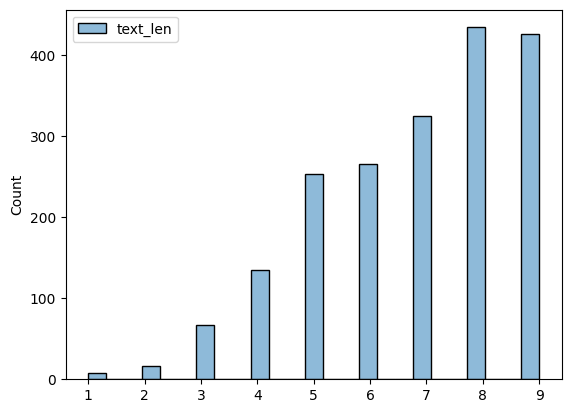

In [ ]:
sns.histplot(df[df['text_len']<10], kde=False)

In [ ]:
df = df[df['text_len'] > 4]

<Axes: ylabel='Count'>

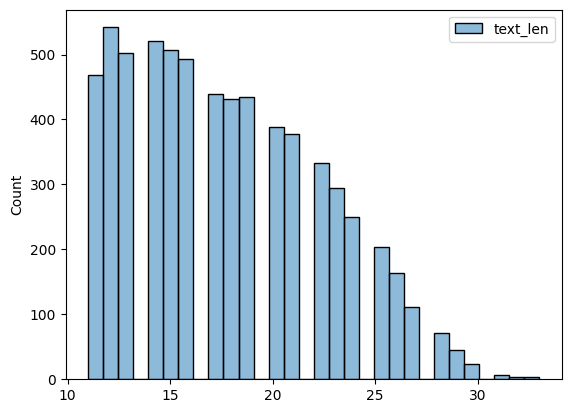

In [ ]:
sns.histplot(df[df['text_len']>10], kde=False)

In [ ]:
df = df[df['text_len'] < 26]

In [ ]:
df

,text,gender,cleaned,text_len
0,Robbie E Responds To Critics After Win Against...,male,robbie e responds to critics after win against...,13
1,ÛÏIt felt like they were my friends and I was...,male,it felt like they were my friends and i was li...,17
3,Hi @JordanSpieth - Looking at the url - do you...,male,hi looking at the url do you use dont typicall...,16
4,Watching Neighbours on Sky+ catching up with t...,female,watching neighbours on sky catching up with th...,11
5,"Ive seen people on the train with lamps, chair...",female,ive seen people on the train with lamps chairs...,11
...,...,...,...,...
20044,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,female,need a ride home from practice and its raining...,11
20045,"@lookupondeath ...Fine, and I'll drink tea too...",female,fine and ill drink tea too i love you,9
20046,Greg Hardy you a good player and all but don't...,male,greg hardy you a good player and all but dont ...,21
20047,You can miss people and still never want to se...,male,you can miss people and still never want to se...,12


Нормализация

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8794 entries, 3715 to 15052
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        8794 non-null   object
 1   gender      8794 non-null   object
 2   cleaned     8794 non-null   object
 3   text_len    8794 non-null   int64 
 4   normalised  8794 non-null   object
dtypes: int64(1), object(4)
memory usage: 412.2+ KB


In [ ]:

import nltk
nltk.download('punkt', download_dir='/usr/local/nltk_data')
nltk.data.path.append('/usr/local/nltk_data')  # Указываем путь к данным
nltk.download('punkt_tab')
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

stemmer = SnowballStemmer("english")

def stem_text(text):
    words = word_tokenize(text)  # Токенизируем текст на слова
    stemmed_words = [stemmer.stem(word) for word in words]  # Применяем стемминг
    return " ".join(stemmed_words)  # Объединяем слова обратно в строку

df['normalised'] = df['cleaned'].apply(stem_text)

[nltk_data] Downloading package punkt to /usr/local/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
df

,text,gender,cleaned,text_len,normalised
0,Robbie E Responds To Critics After Win Against...,male,robbie e responds to critics after win against...,13,robbi e respond to critic after win against ed...
1,ÛÏIt felt like they were my friends and I was...,male,it felt like they were my friends and i was li...,17,it felt like they were my friend and i was liv...
3,Hi @JordanSpieth - Looking at the url - do you...,male,hi looking at the url do you use dont typicall...,16,hi look at the url do you use dont typic see a...
4,Watching Neighbours on Sky+ catching up with t...,female,watching neighbours on sky catching up with th...,11,watch neighbour on sky catch up with the neigh...
5,"Ive seen people on the train with lamps, chair...",female,ive seen people on the train with lamps chairs...,11,ive seen peopl on the train with lamp chair tv...
...,...,...,...,...,...
20044,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,female,need a ride home from practice and its raining...,11,need a ride home from practic and it rain hard...
20045,"@lookupondeath ...Fine, and I'll drink tea too...",female,fine and ill drink tea too i love you,9,fine and ill drink tea too i love you
20046,Greg Hardy you a good player and all but don't...,male,greg hardy you a good player and all but dont ...,21,greg hardi you a good player and all but dont ...
20047,You can miss people and still never want to se...,male,you can miss people and still never want to se...,12,you can miss peopl and still never want to see...


In [ ]:
df=df[['gender','normalised','text_len']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['gender_encoded'] = encoder.fit_transform(df['gender'])

<ipython-input-134-75340b1eaf81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender_encoded'] = encoder.fit_transform(df['gender'])


In [ ]:
df = df.drop(columns = 'gender')
df

KeyError: "['gender'] not found in axis"

Обучение

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['gender_encoded'])
y = df['gender_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['normalised'])
y = df['gender_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
print(f"Точность SVM: {accuracy_score(y_test, y_pred_svm)}")
print(f"Полнота: {}")

Точность SVM: 0.6029094827586207
